## Step 4. Exploratory data analysis (Python)

### Objective: 
A new ride-sharing company is launching in Chicago (Zuber). The task is to find patterns in the available information and to understand passenger preferences and the impact of external factors on rides.
We will study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.
As follow: 
<ul>
<li>We will import the necessary tables for the study</li>
<li>Then we will study the data they contain</li>
<li>We will make sure the data types are correct</li>
<li>We will identify the top 10 neighborhoods in terms of drop-offs</li>
<li>We will make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs</li>
<li>We will draw conclusions based on each graph and explain the results</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind

In [2]:
#importing csv files
taxi_trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods_average_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
data_for_hypothese= pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
#stying the data contain in the taxi_trips_amount table + making sure data types are correct
taxi_trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#stying the data contain in the neighborhoods_average_trips table + making sure data types are correct
neighborhoods_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
#looking for duplicates
taxi_trips_amount.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [6]:
#looking for duplicates
neighborhoods_average_trips.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

The tables look good, there are no missing values, the data types are correct. It's safe to proceed with the analysis

In [7]:
#Finding the Top 10 neighborhoods based on average trips

top_10_neighborhoods = neighborhoods_average_trips.nlargest(10, 'average_trips')
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


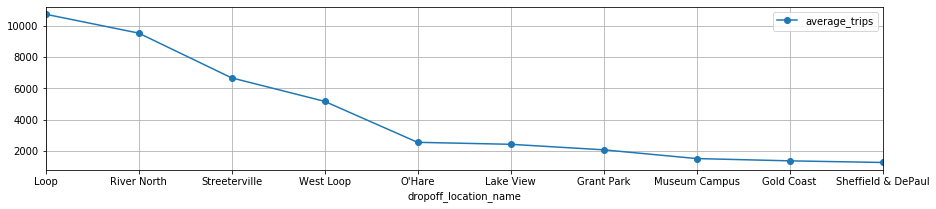

In [8]:
# ploting the results into a graph

top_10_neighborhoods.plot(x='dropoff_location_name', y='average_trips', style='o-', grid=True, figsize=(15, 3))
plt.show()

A lot of trips on November 15-16, 2017 Loop leads chart followed by River North and Streeterville

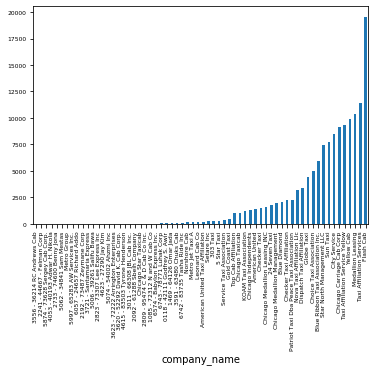

In [9]:
# Sketching a visual representation of the trips amount for the taxi companies.

taxi_trips_amount.groupby('company_name')['trips_amount'].sum().sort_values().plot.bar(fontsize=6)
plt.show()

This graph shows a huge disparity where some companies have fewer than 50 trips are some with 9000 trips. We could also exclude the companies with less than 100 drives.

In [10]:
#printing the results. 
taxi_trips_amount.sort_values('trips_amount', ascending= False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [11]:
#dropping companies with less than 100 trips
taxi_trips_amount.drop(taxi_trips_amount[taxi_trips_amount['trips_amount'] < 100].index, inplace = True)

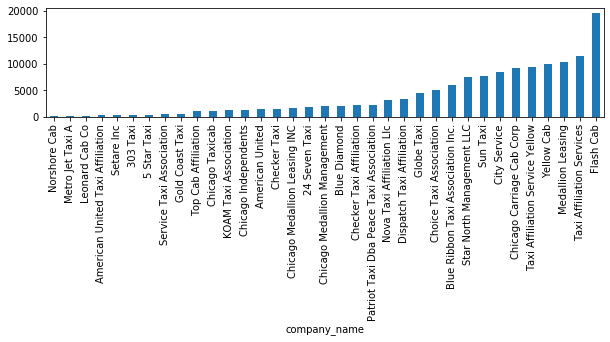

In [12]:
taxi_trips_amount.groupby('company_name')['trips_amount'].sum().sort_values().plot.bar(figsize=(10,2))
plt.show()

Flash Cab Taxi, Affiliation Services, and Medallion Leasing	 lead the chart. What could possibly explain that disparity in just 2 days? Some companies work during Bad weather while the other companies wait for a Good weather? <b>are these cities close to an international airport?</b> is this the weekend of the super bowl? is Beyonce having a concert close to those towns? 

## Hypothesis test

Test the hypothesis:<br>
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [13]:
#let's check the data in this table
data_for_hypothese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


We are working with 1068 total entries, the "start_ts" column doesn't have the proper data type - should be datetime ( this will be converted below). The "weather_conditions" are string entries so data type object is ok the "duration-seconds" column has a float data type also ok in this case. 

In [14]:
data_for_hypothese.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
data_for_hypothese.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Looking at the description of the table, we can see right away that the min value for trip duration is 0.00 - that means all trips with duration_seconds = 0.0 never happened, therefore they should be taken out of the analysis. 

In [16]:
data_for_hypothese[data_for_hypothese['duration_seconds'] == 0.0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [17]:
data_for_hypothese.drop( data_for_hypothese[data_for_hypothese['duration_seconds'] == 0.0].index , inplace=True)

In [18]:
data_for_hypothese.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [19]:
data_for_hypothese.duplicated().sum()

197

I will not eliminate the duplicated values in this case because the table doesn't have a unique key so there is a fair chance that multiple rides had the same pickup date and time, under the same weather conditions, and same duration going to the same destination(the airport) 

In [20]:
# let's change the 'start_ts' data type from object to datetime 

data_for_hypothese["start_ts"] = pd.to_datetime(data_for_hypothese["start_ts"])

In [21]:
# we will use the weather conditions (rainy or non-rainy) on saturdays 
rain_on_saturday = data_for_hypothese[(data_for_hypothese["start_ts"].dt.weekday==5)&(data_for_hypothese["weather_conditions"]!="Good")]["duration_seconds"].values
no_rain_on_saturday = data_for_hypothese[(data_for_hypothese["start_ts"].dt.weekday==5)&(data_for_hypothese["weather_conditions"]=="Good")]["duration_seconds"].values

In [22]:
data_for_hypothese.groupby('weather_conditions').duration_seconds.describe()

,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Bad,180.0,2427.205556,721.314138,480.0,1962.00,2540.0,2928.0,4980.0
Good,882.0,2013.278912,743.565217,60.0,1397.25,1800.0,2460.0,7440.0


This output clearly shows that there are more rides in Good weather. I removed trips with 0.0 duration time. 

H0: Average duration of rides in both good and bad weather is the same;
H1: Average duration of rides for both good and bad is different.

p_value< 0.05, reject null hypothesis 

In [23]:
# Testing the hypothesis that Average revenue of the Ultimate and Surf Calling Plans differs
ttest, pval = ttest_ind(rain_on_saturday,no_rain_on_saturday)
print("P-value is",pval)
if(pval < 0.05):
    print("Reject the Null hypothesis (Average duration of rides for both good and bad is different)")
else:
    print("Accept the Null hypothesis (Average duration of rides in both good and bad weather is the same)")

P-value is 1.3318772977743245e-11
Reject the Null hypothesis (Average duration of rides for both good and bad is different)


### Conclusion

There is a significant difference in trip duration in good vs bad weather. Therefore, rejecting the bull hypothesis makes sense. The count of trips in good weather is approximately five time more than the tips in bad weather. Although the assertion above might be correct, all the trip durations are not accurate, I found that some trips had 0.0 seconds or less than 1 minute - those are not actual trips but this not significant enough to change the results of our test statistic.

The initial task was to find patterns in the available information and to understand passenger preferences and the impact of external factors on rides. The weather is definitely a factor: 882.0 rides on Good weather vs 180.0 rides on Bad weather is a significant difference. The company should charge more for trips during bad weather to balance it out. The huge number of trips could be explained by the fact that the neighborhoods we studied are close to the airports and the date goes from Friday afternoon to Saturday evening
